In [1]:
import sys
sys.path.append('./../')

import ikamoana.ikaseapodym as ikadym

from ikamoana.utils import seapodymFieldConstructor
from ikamoana.ikafish.ikafish import IkaFish, IkaFishDebug

In [2]:
configuration_filepath = "./../data/ikamoana_config/IkaSim_Example_Fish_025_30.xml"
my_sim = ikadym.IkaSeapodym(filepath=configuration_filepath)

In [3]:
my_sim.ika_params

{'start_distribution': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/',
 'seapodym_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/SEAPODYM_data/run-test/data/po_freeglorys_0.25x30d_1998_2019/skj_ref2018_freeglorys_reanalysis_025x30d_vgpm_Fref.xml',
 'forcing_dir': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/',
 'start_time': numpy.datetime64('2000-01-15'),
 'duration_time': 94694400,
 'delta_time': 1296000,
 'output_delta_time': 2592000,
 'spatial_limits': {'lonlim': (120.0, 290.0), 'latlim': (-40.0, 50.0)},
 'files_only': False,
 'files_home_directory': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/IkaSim_Example_025_30/',
 'forcing_files': {'forcing_dataarray': {}, 'forcing_dataset': {}},
 'fields_interp_method': 'nearest',
 'start_length': 26.43,
 'ageing_cohort': True,
 'number_of_cohorts': 10000,
 'start_dynamic_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ika

In [ ]:
my_sim.loadFields()

In [5]:
# my_sim.oceanToNetCDF("./../data/ikamoana_data", to_dataset=True)

In [6]:
my_sim.initializeParticleSet(particles_class=IkaFishDebug, method="start_cell")

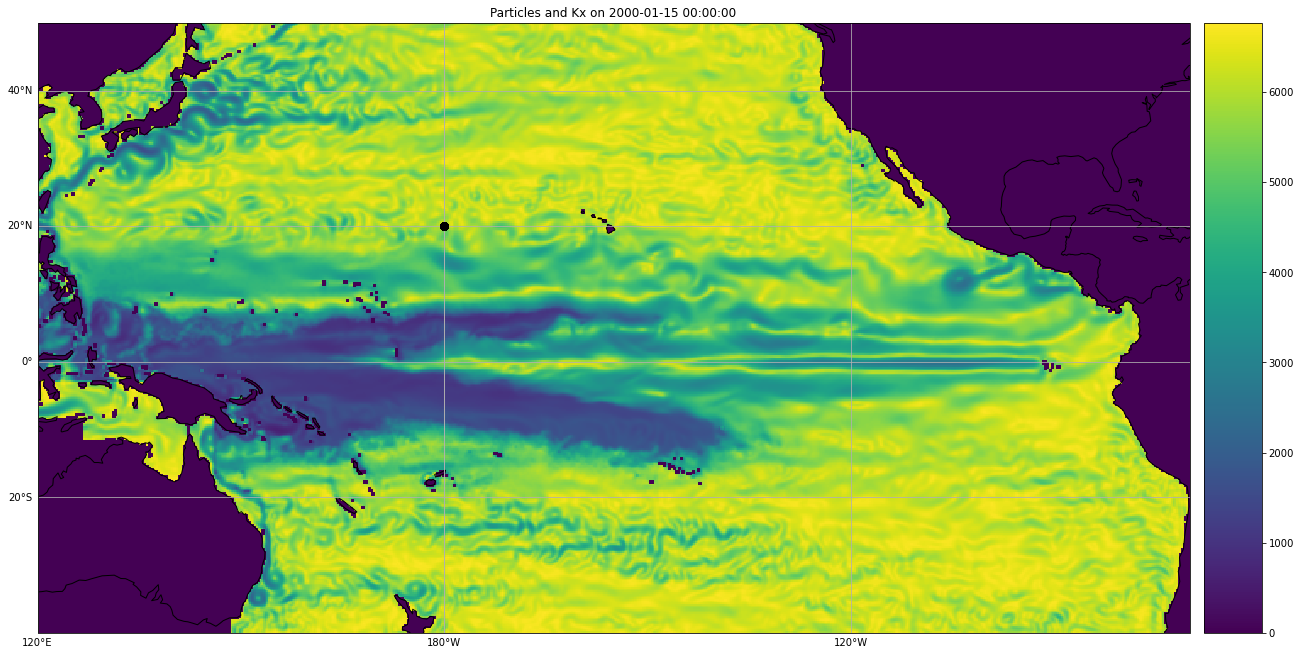

In [7]:
my_sim.fish.show(field=my_sim.ocean.Kx)

In [8]:
my_sim.runKernels(save=True)

INFO: Compiled ArrayIkaFishDebugCalcLonLatScalersIkAdvectionRK4TaxisRK4RandomWalkNonUniformDiffusionIkaDimMoveWithDiffusionRerollLandBlock ==> /tmp/parcels-1000/lib01180f568faec529ac815ffa8df069ef_0.so
/home/ash/anaconda3/envs/ikamoana/lib/python3.9/site-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


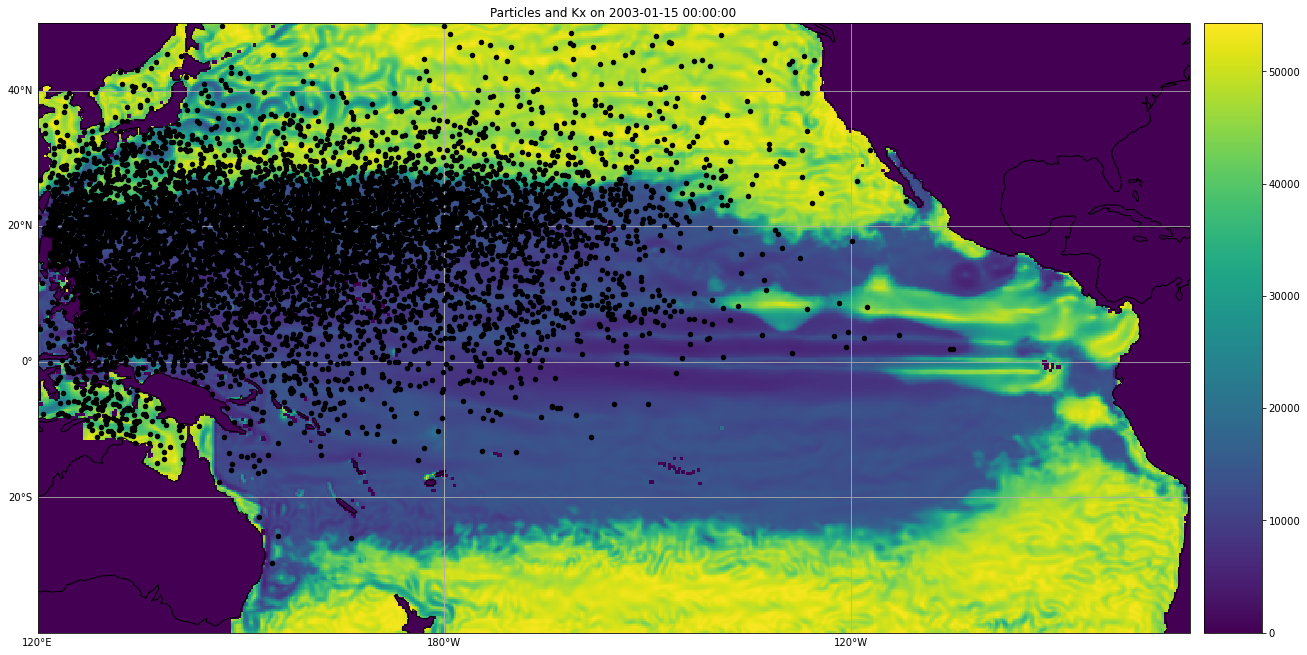

In [9]:
my_sim.fish.show(field=my_sim.ocean.Kx)

---

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [13]:
filepath = "./IkaSim_Example_Fish_025_30_particleFile.nc"
particle_file = xr.load_dataset(filepath)
particle_file

<xarray.Dataset>
Dimensions:       (traj: 10000, obs: 38)
Dimensions without coordinates: traj, obs
Data variables: (12/19)
    trajectory    (traj, obs) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan
    time          (traj, obs) datetime64[ns] 2000-01-15 2000-02-14 ... NaT NaT
    lat           (traj, obs) float32 19.92 20.37 16.93 16.32 ... nan nan nan
    lon           (traj, obs) float32 179.9 178.8 178.4 176.7 ... nan nan nan
    z             (traj, obs) float32 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan
    Tx            (traj, obs) float32 0.0 -0.08561 0.09801 ... nan nan nan
    ...            ...
    Cx            (traj, obs) float32 0.0 0.04772 0.07686 ... nan nan nan
    Cy            (traj, obs) float32 0.0 0.007706 0.0556 ... nan nan nan
    Ax            (traj, obs) float32 0.0 -0.148 0.1545 -1.356 ... nan nan nan
    Ay            (traj, obs) float32 0.0 -0.06255 0.2347 ... nan nan nan
    Rx_component  (traj, obs) float32 0.0 2.385e+05 2.6e+05 ... nan nan nan
    Ry_component  (traj, obs) float32 0.0 2.381e+05 2.586e+05 ... nan nan nan
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.3.0
    parcels_mesh:           spherical

In [14]:
mean_Dx = np.absolute(particle_file['Dx']).mean(axis=0)
mean_Dy = np.absolute(particle_file['Dy']).mean(axis=0)
mean_Cx = np.absolute(particle_file['Cx']).mean(axis=0)
mean_Ax = np.absolute(particle_file['Ax']).mean(axis=0)
mean_Tx = np.absolute(particle_file['Tx']).mean(axis=0)

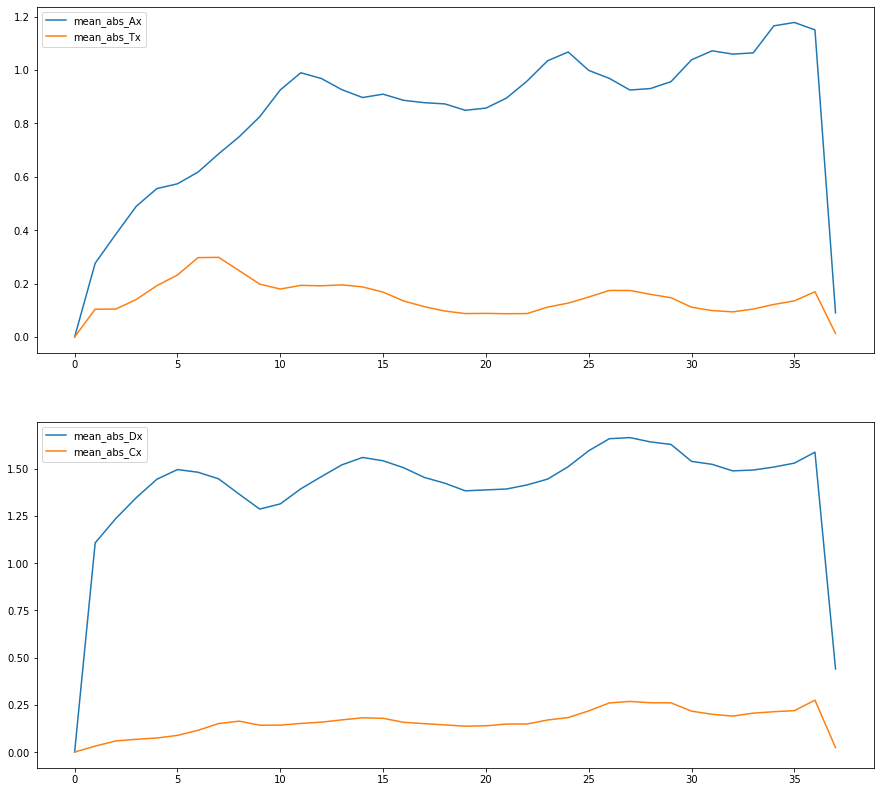

In [15]:
fig, (axe1, axe2) = plt.subplots(2,1,figsize=(15,14))

axe1.plot(mean_Ax)
axe1.plot(mean_Tx)
axe1.legend(["mean_abs_Ax","mean_abs_Tx"])

axe2.plot(mean_Dx)
axe2.plot(mean_Cx)
axe2.legend(["mean_abs_Dx","mean_abs_Cx"])